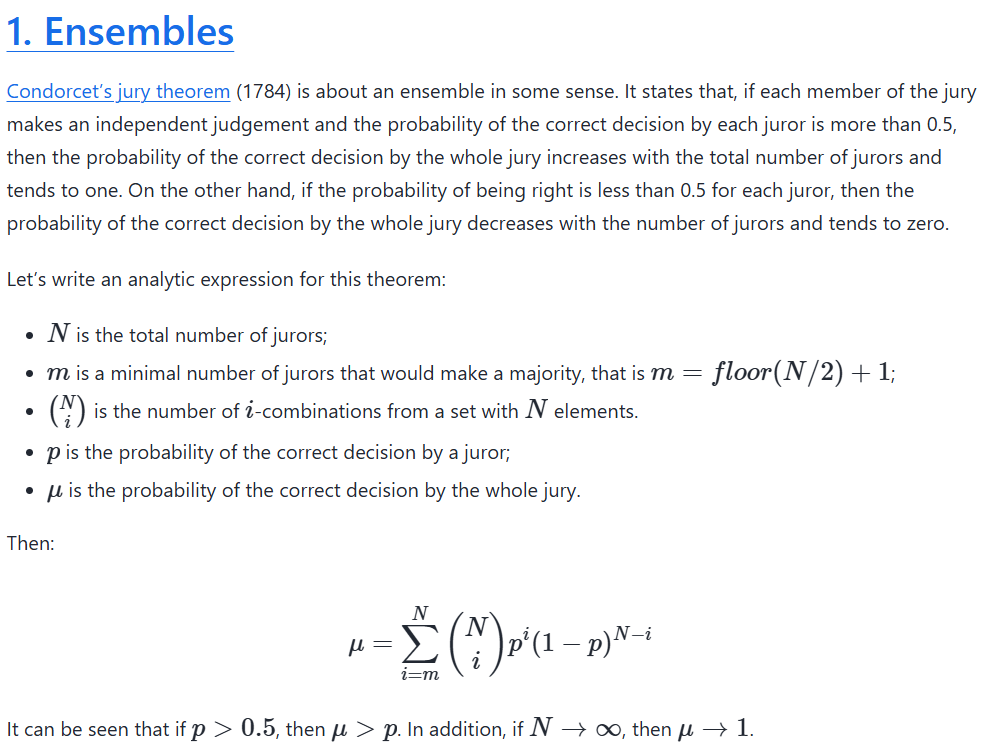

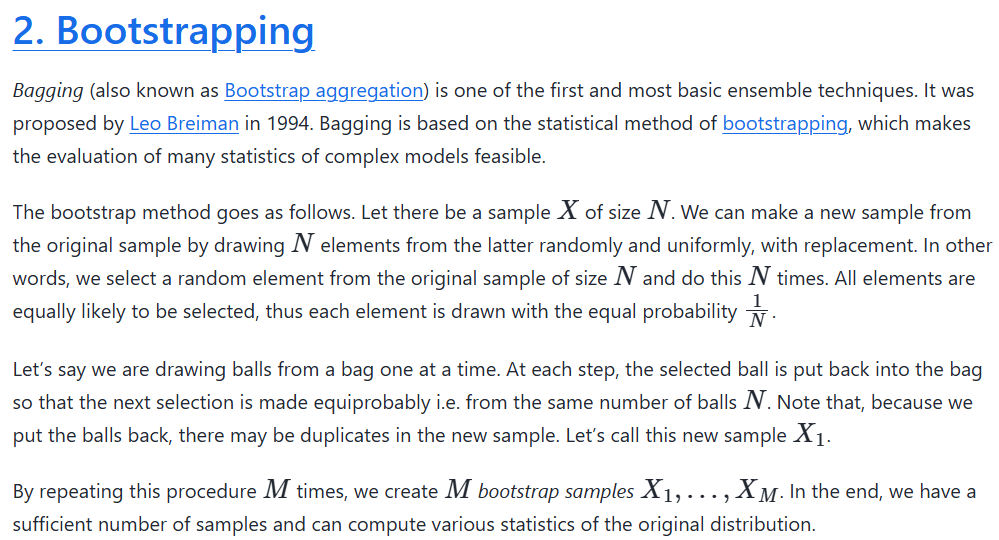

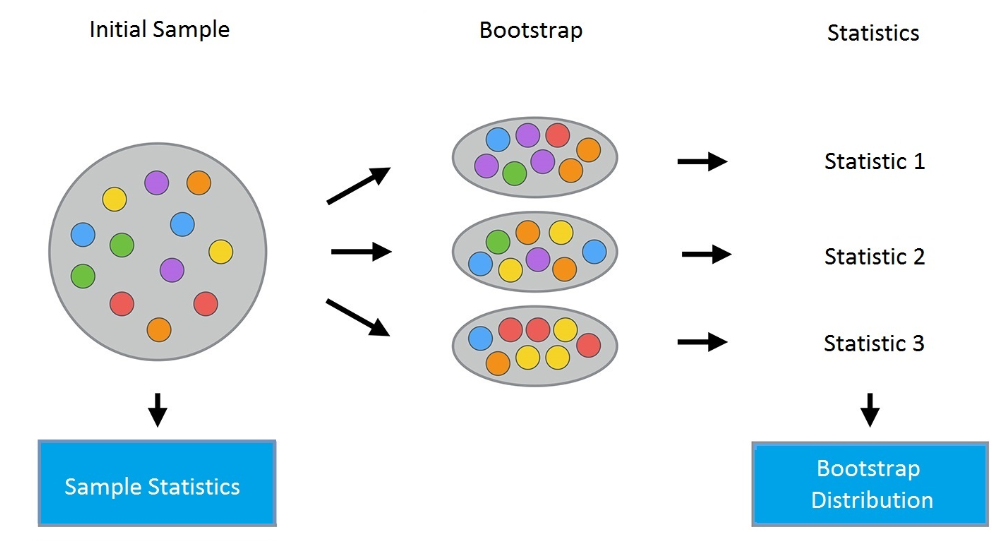

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

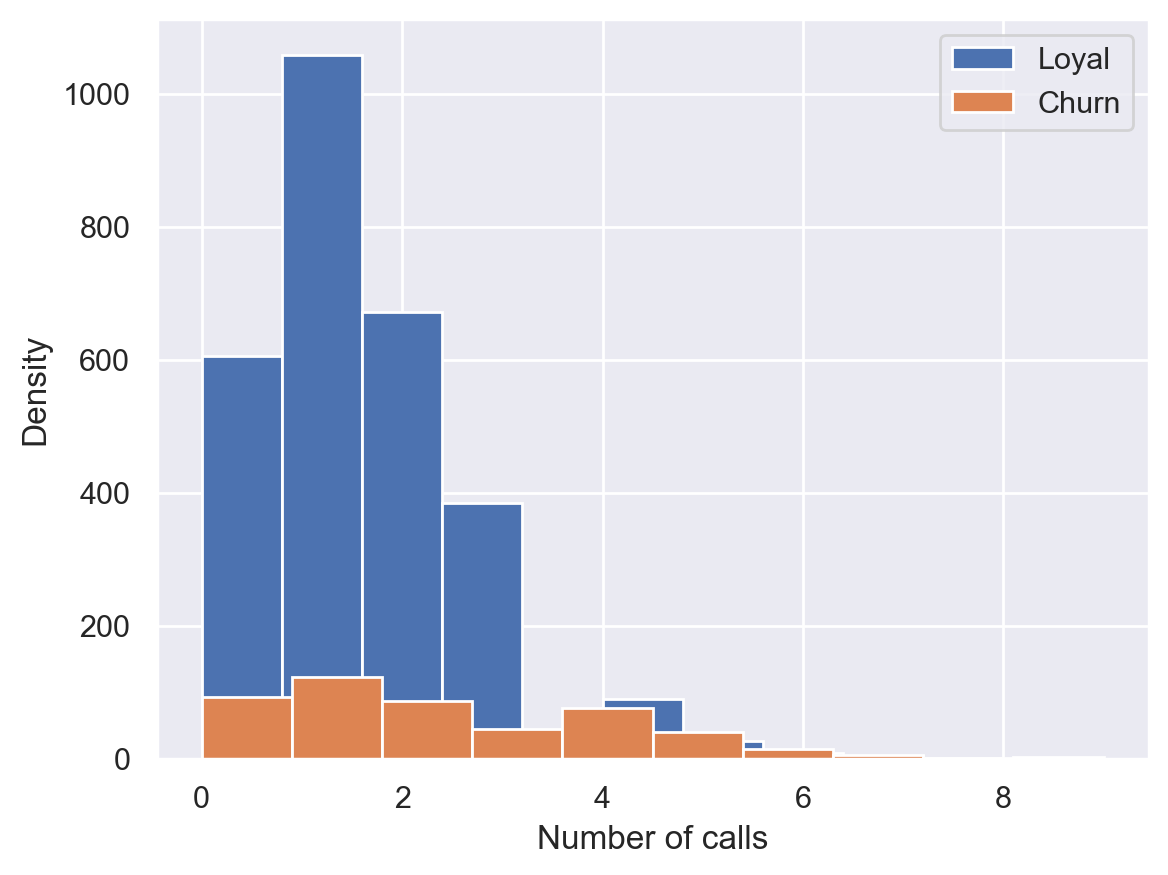

In [3]:
telecom_data = pd.read_csv(DATA_PATH + "telecom_churn.csv")

telecom_data.loc[telecom_data["Churn"] == False, "Customer service calls"].hist(
    label="Loyal"
)
telecom_data.loc[telecom_data["Churn"] == True, "Customer service calls"].hist(
    label="Churn"
)
plt.xlabel("Number of calls")
plt.ylabel("Density")
plt.legend();

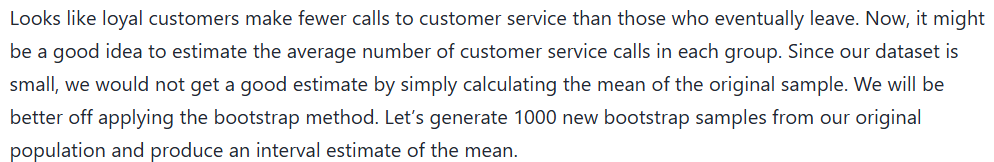

In [4]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False, "Customer service calls"
].values
churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True, "Customer service calls"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]
churn_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

# Print the resulting interval estimates
print(
    "Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05)
)
print(
    "Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]


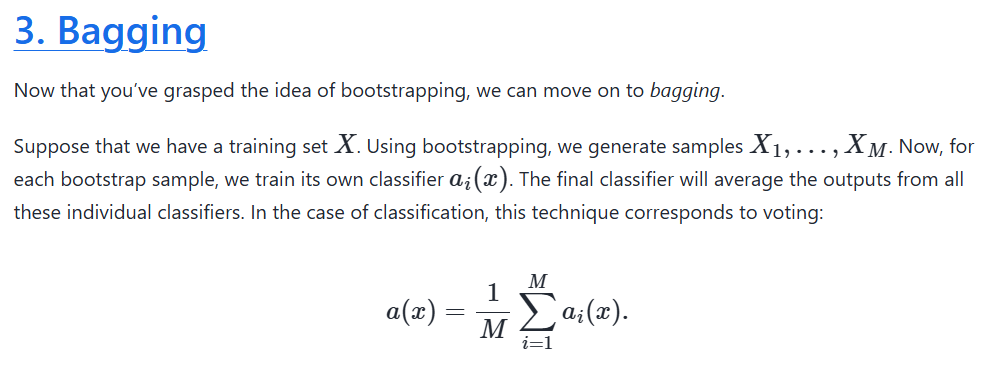

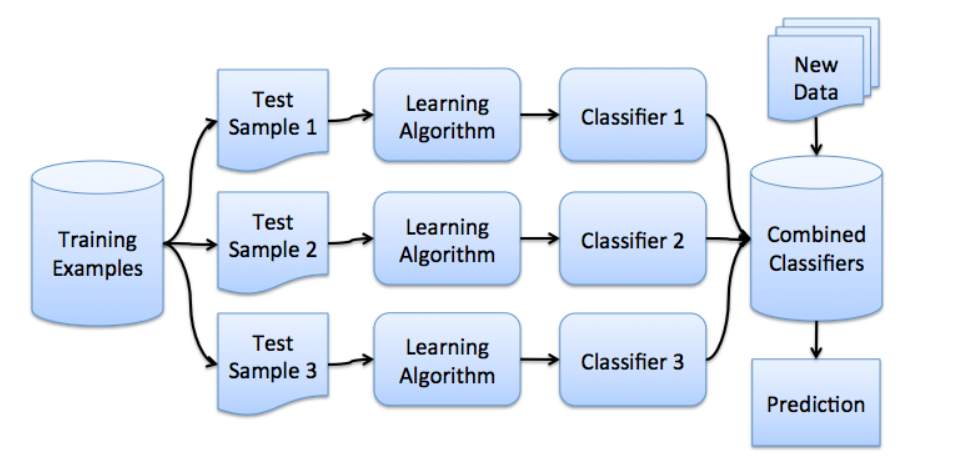

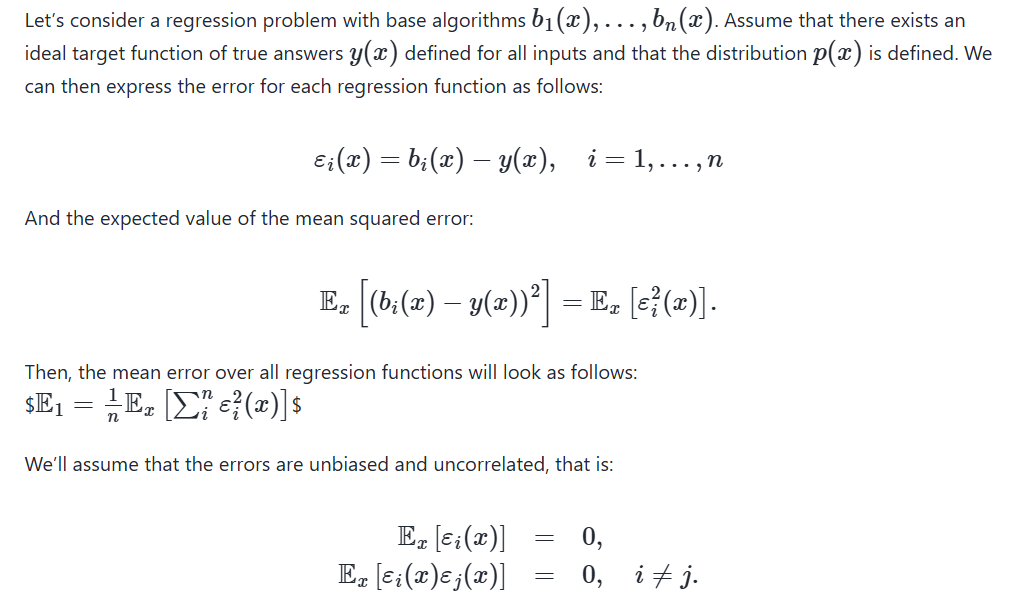

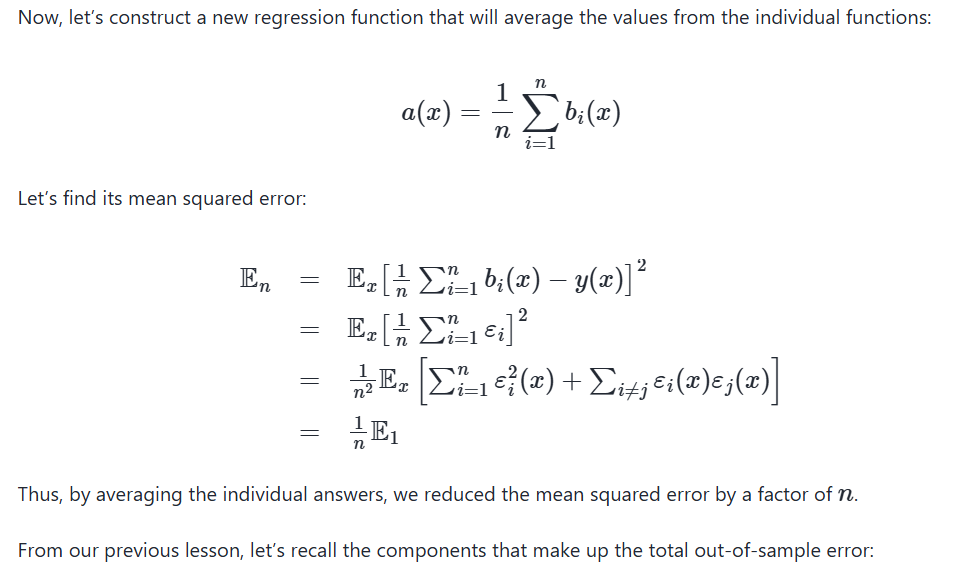

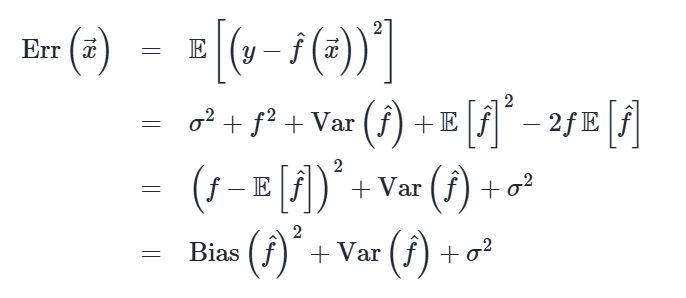

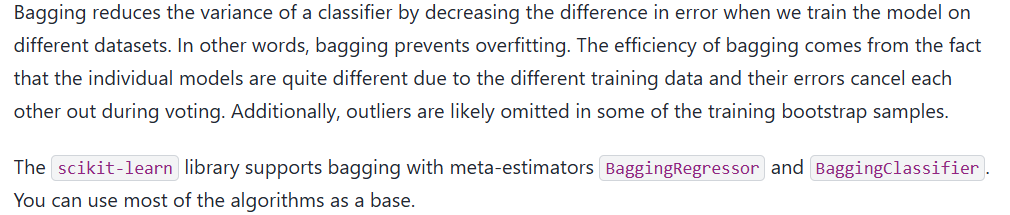

[see scikit-learn docs](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)


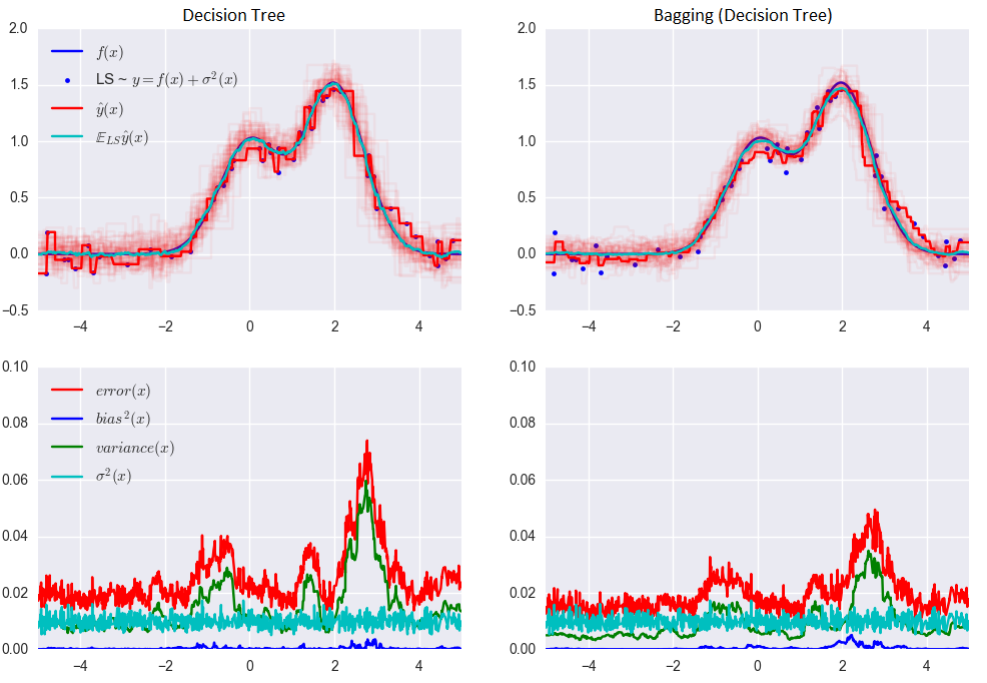

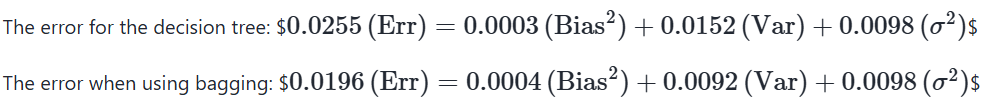

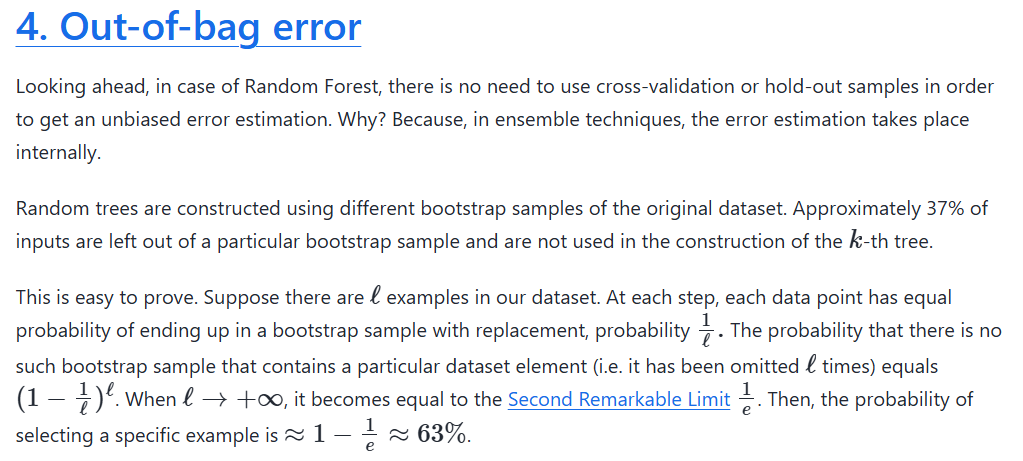

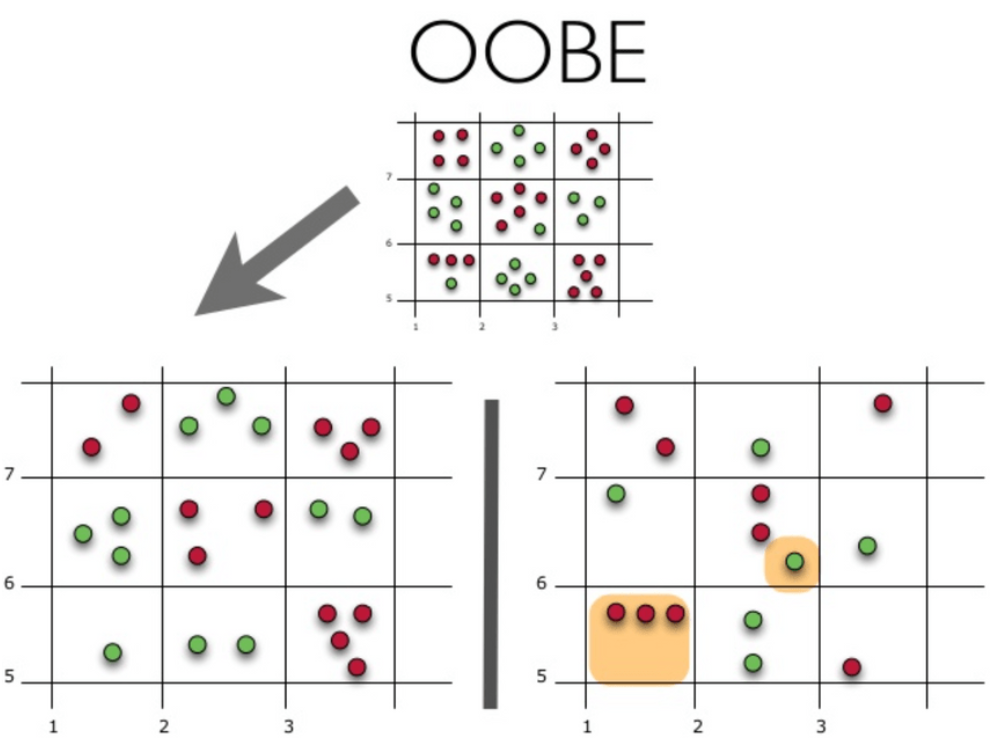

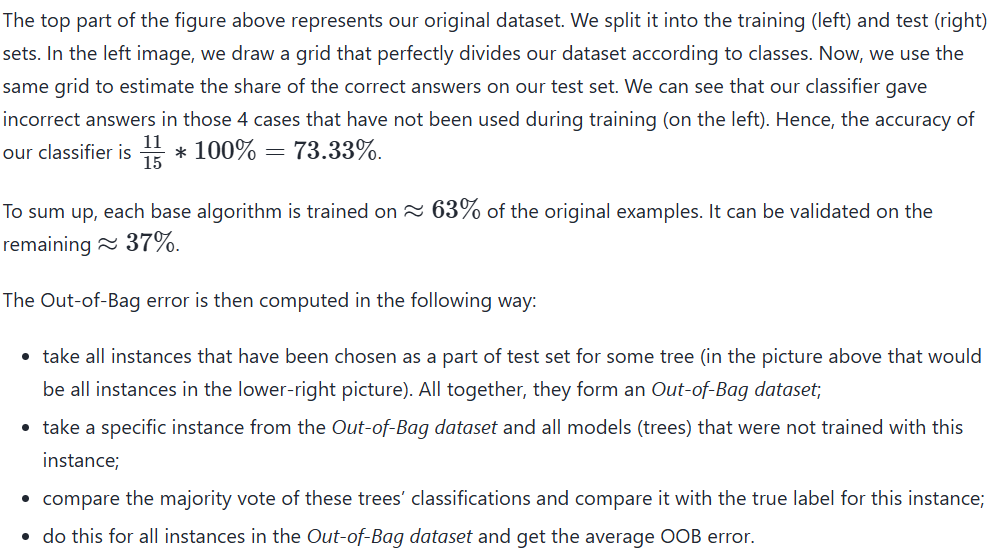